In [1]:
# ( Bilgilendirme )  ------>>  ctrl + (sesli) u  Saga Dogru, ctrl + (sesli) g  Sola Dogru Code'yi Kaydirma Islemi Yapar

In [2]:
# Veri On Isleme Bolumu

In [3]:
# Veri mi ? Model mi ?

# Veri : Kullanacak Oldugumuz Veriyi Ifade Ediyor
# Model : Kuracak Oldugumuz Makine Ogrenmesi Modellerini Ifade Ediyor ( Yapay Zeka Modellerini Ifade Ediyor ) 

# Yapilacak Olan Islemler Veri'den Beslenmektedir ( Boyle Bir Sorunun Cevabi Cok Yuksek Ihtimalle "Veri" Olacaktir )

# Aykiri Gozlem Analizi

In [4]:
# -- Aykiri Degerleri Yakalamak --

In [5]:
import seaborn as sns
import pandas as pd

In [6]:
df = pd.read_csv("../input/seaborn-practice/diamonds.csv")
df = df.select_dtypes(include = ["float64", "int64"]) # Sadece Icerisindeki Sayisal Degiskenlere Erismek Icin Bir Tip Secimi Gerceklestirdik
df = df.dropna() # Veri Setinin Icerisindeki Eksik Degerleri Silerek ( Disarida Birakarak ) Son Data_Frame'mizi Olusturuyoruz
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [7]:
# Amacimiz Bir Degisken Icin Bir Aykiri Deger Gerceklestirmek

df_table = df["table"]

df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

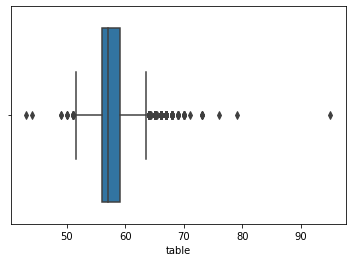

In [8]:
sns.boxplot(x = df_table);

# Grafikte Bulunan Kenarlardaki Cizgiler, Bizim Assagida Hesapladigimiz Degerlerdir ( alt_sinir, ust_sinir )
# Boxplot Bize Bunu Hesaplayip Veriyor Zaten ( Gorsel Olarak )
# Biz Bu Degerleri El Yordami Ile Gorebilmek Adina ( Kendimiz Bulabilmek Adina ) Hesaplama Yaptik

In [9]:
Q1 = df_table.quantile(0.25) # Degiskenin Kucukten Buyuge Siralandiginda % 25 'inci Indexine Karsilik Gelen Degeri Alicak
Q3 = df_table.quantile(0.75)

# Hesaplamanin Yapildigi Yer

IQR = Q3 - Q1

In [10]:
Q1 # Gozlemleyelim

56.0

In [11]:
Q3 # Gozlemleyelim

59.0

In [12]:
IQR # Gozlemleyelim

3.0

In [13]:
# Simdi Boxplot Yontemi Ile Esik Degerleri Hesaplama Islemi Gerceklestiricez Bunu Hesaplamak Icin    IQR, Q1, Q2    Degerlerini Kullanicaz

In [14]:
alt_sinir = Q1 - 1.5 * IQR # Birinci Ceyrek Degerimizden (1.5 * IQR) Kadar Assagisini Alt Sinir Olarak Belirle Demek ( Esik Degeri Olarak Belirle Demek )
ust_sinir = Q3 + 1.5 * IQR

In [15]:
alt_sinir # Gozlemleyelim

51.5

In [16]:
ust_sinir # Gozlemleyelim

63.5

In [17]:
# Amacimiz Aykiri Degerlere Ulasabilmek ( Adim Adim Baslayalim )

df_table < alt_sinir # Bu Bool Sorgulamasini Her Bir Gozlem Icin Sorguladi

0        False
1        False
2        False
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [18]:
# Ya Alt Sinirdan Kucuk Olanlari Yada Ust Sinirden Buyuk Olanlari Sorgulamis Olduk

(df_table < alt_sinir) | (df_table > ust_sinir) # Bu Sarti Saglayanlar "True" , Saglamayanlar "False" Degeri Verir

# Biz Sadece Su An Sorgulama Yapmis Olduk

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [19]:
aykiri_tf = (df_table < alt_sinir) # Aykiri True False Isminde Bi Degisken

aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [20]:
# Simdi Aykiri Deger Elemanlarina Ulasmak Istiyoruz Bu Islemi Fancy Index Yontemi Ile Yapicaz

In [21]:
df_table[aykiri_tf] # [] Ifadesinin Icerisinde True Olanlari Gosterte Biliyoduk Yani Aykiri Elemanlara Fancy Index Yardimi Ile Ulasmis Olduk

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [22]:
# Aykiri Elemanlarin Index Degerlerine Su Sekilde Erisebiliriz

df_table[aykiri_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

In [23]:
# Bu Aykiri Degerleri Yakalama Islemlerini Ogrenmemizin Sebebi; Bunlari Silmek, Duzenlemek Gibi Islemlere Sokucaz

# Aykiri Deger Problemini Cozmek

### 1. Yaklasim   -- Silme Yaklasimi --

In [24]:
# Pandas Kutuphanesi "import" Edilir Sonra

type(df_table) # Pandas Serisi Formunda Oldugunu Gorduk

pandas.core.series.Series

In [25]:
# Bunu Bir Pandas Data_Frame'sine Cevirmemiz Gerekiyor

df_table = pd.DataFrame(df_table) # Cevirme Islemini Gerceklestirdik

In [26]:
df_table.shape

(53940, 1)

In [27]:
# Amac: Ust Ve Alt Sinirlari Goz Onunde Bulundurarak Aykiri Olmayan Degerlere Ulasmaya Calismak

# ( Bilgilendirme ) ----->>  alt gr Tusuna Basarak Iki Tane (sesli) u Yaparsan "Tilda" Isareti Yapilmis Olur

t_df = df_table[~( ( ( df_table < alt_sinir ) | ( df_table > ust_sinir ) ) ).any( axis = 1 ) ] 

# Temiz Data_Frame Adinda Bir Degisken, "Tilda" Isaretini Koymamizin Sebebi Kosulu Saglamayanlari Al Demektir ( Aykiri Olmayanlari Sec Diyoruz )

# "Tilda" Isareti Sonrasinda Python Anlamis Oluyor Ki ( Isaretin ) Saginda Yer Alan Kosulun Disindakileri Getir Demis Oluyor

# .any( axes = 1 ) ------>> Koymamizin Sebebi Sutun Bazinda Bir Islem Yapmak Istememizdi

In [28]:
t_df.shape # Yukaridaki shape Ile Burada ki Shape yi Karsilastirirsak 605 Tane Gozlem Birimi Gitmis Oldugunu Goruyoruz, Demekki 605 Adet Aykiri Gozlem Varmis

(53335, 1)

### 2. Yaklasim   -- Ortalama Ile Doldurma --

In [29]:
# Dersler Arasinda Veri Setimize Cesitli Islemler Uyguladigimizdan Bastan import Ediyorum Veri Setini

df = pd.read_csv("../input/seaborn-practice/diamonds.csv")
df = df.select_dtypes(include = ["float64", "int64"]) # Sadece Icerisindeki Sayisal Degiskenlere Erismek Icin Bir Tip Secimi Gerceklestirdik
df = df.dropna() # Veri Setinin Icerisindeki Eksik Degerleri Silerek ( Disarida Birakarak ) Son Data_Frame'mizi Olusturuyoruz
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [30]:
df_table = df["table"]

In [31]:
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [32]:
# Aykiri Degerleri Ortalama Ile Degistiricez

df_table[aykiri_tf] # Bunlar Alt Sinirdaki Aykiri Degerler

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [33]:
df_table.mean()

57.45718390804598

In [34]:
df_table[aykiri_tf] = df_table.mean() # Aykirilari Yakaladik Ve Bunlara Ortalama Atamasi Yaptik ( Uyariyi Gormezden Geliyoruz )

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_table[aykiri_tf] # Atama Isleminin Basari Ile Yapildigini Gorduk

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

### 3. Yaklasim   -- Baskilama Yontemi --

In [36]:
# Baskilama Yonteminde;
# Aykirilar Yakalandiktan Sonra Ust Tarafta Ise Ust Sinir Degerine Esitlenir, Alt Tarafta Ise Alt Sinir Degerine Esitlenir

In [37]:
# Dersler Arasinda Veri Setimize Cesitli Islemler Uyguladigimizdan Bastan import Ediyorum Veri Setini

df = pd.read_csv("../input/seaborn-practice/diamonds.csv")
df = df.select_dtypes(include = ["float64", "int64"]) # Sadece Icerisindeki Sayisal Degiskenlere Erismek Icin Bir Tip Secimi Gerceklestirdik
df = df.dropna() # Veri Setinin Icerisindeki Eksik Degerleri Silerek ( Disarida Birakarak ) Son Data_Frame'mizi Olusturuyoruz
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [38]:
df_table = df["table"]

In [39]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [40]:
# Simdi Baskilicaz

# Alt Sinir Degerinden Assagida Kalan Degerleri Baskilicaz ( Nereye Baskilicaz ) Alt Sinira Baskilicaz

In [41]:
# Alt Sinir Degeri Neydi?

alt_sinir

51.5

In [42]:
df_table[aykiri_tf] = alt_sinir # Cok Ic Guduye Uygun Bir Bicimde Esitleme Islemi Yaptik ( Uyariyi Gormezden Geliyoruz )

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
df_table[aykiri_tf] # Kontrol Etmek Amaci Ile Yazdik Ve Goruyoruz ki Islemimiz Basari Ile Gerceklestirilmis

1515     51.5
3238     51.5
3979     51.5
4150     51.5
5979     51.5
7418     51.5
8853     51.5
11368    51.5
22701    51.5
25179    51.5
26387    51.5
33586    51.5
35633    51.5
45798    51.5
46040    51.5
47630    51.5
Name: table, dtype: float64

## Çok Değişkenli Aykırı Gözlem Analizi  ( Ileri Seviye Bir Islemdir )

### Local Outlier Factor ( LOF  Yontemi )

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularınının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

In [44]:
# Dersler Arasinda Veri Setimize Cesitli Islemler Uyguladigimizdan Bastan import Ediyorum Veri Setini

diamonds = pd.read_csv("../input/seaborn-practice/diamonds.csv")
diamonds = diamonds.select_dtypes(include = ["float64", "int64"]) # Sadece Icerisindeki Sayisal Degiskenlere Erismek Icin Bir Tip Secimi Gerceklestirdik
df = diamonds.copy()
df = df.dropna() # Veri Setinin Icerisindeki Eksik Degerleri Silerek ( Disarida Birakarak ) Son Data_Frame'mizi Olusturuyoruz
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [45]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [46]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

# n_neighbors : Komsuluk Sayisi
# contamination : Yogunlugu Ifade Eder

In [47]:
# "clf"  Nesnesi  "LocalOutlierFactor" Un Bicimsel Ozelliklerini Barindiriyor
# Simdi Bunlari Kullanarak Fit etme Islemi ( Algoritmayi Calistirma Islemi ) Yapicaz

clf.fit_predict(df) # Su Anda Her Bir Gozlem Birimi Icin Skorlar Olucak

array([-1, -1, -1, ...,  1,  1,  1])

In [48]:
df_scores = clf.negative_outlier_factor_ # Boyle Bir Fonksiyon Calistirdik

In [49]:
# df_scores.head()   ------>>   df_scores    Ifadesi Bir Numpy Arrayi Oldugu Icin    .head()   Pandas Fonksiyonudur  ( Gozlemlere Erismek Icin Bu Sekilde "Calistiramayiz" )

# Su Sekilde Gozlemlere Erisebiliriz

df_scores[0:10] # Su Anda Tum Gozlemler Icin Bir "Skor" Degeri Var ( Bir "Esik Degeri" Olarak Kabul Edilebilecek Degerler Var )

# Bu Skor'lar Elimizdeki Her Bir Gozlem Biriminin Yogunluk Skoru ( LocalOutlierFactor Skorudur )

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [50]:
# np.sort(df_scores[0:20])            ==#-#==  BU KULLANIM YANLIS'TIR  ==#-#==

# Sort Ettikten Sonra Secme Islemi Yapmamiz Gerekiyor

np.sort(df_scores)[0:20] # Degerleri Siraladik, Burada Belirleyecek Oldugumuz Bir Esik Degere Gore Bu Islemi Surdurmemiz Gerekiyor ( 8.2 den 5.8 e Bir Atlama Yapmis )

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [51]:
# Rasgele ( Su Anlik ) Bir Index'i Esik Deger Kabul Edip Gerekli Islemleri Gerceklestiricez

esik_deger = np.sort(df_scores)[13]

In [52]:
# Esik Degerden Yukari Olanlari Aykiri_tf Olarak Kayit Et

aykiri_tf = df_scores > esik_deger

In [53]:
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

In [54]:
# Silme Yontemi ( Buranin Altinda Kullanildi )

In [55]:
yeni_df = df[ df_scores > esik_deger ] # Esik Degerden Buyuk Olanlari yeni_df e Kayit Et Dedik ( Yani Su Anda "Aykiri Olmayan" Degerlere Eristik ve Hepsini yeni_df e Kayit Ettik)

In [56]:
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [57]:
df[ df_scores < esik_deger ] # Bunlar da "Aykiri Olan" Gozlemlerdir Sadece Buyuktur ( > ) Ifadesini Kucuktur ( < ) Yaptim

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80
49189,0.51,61.8,55.0,2075,5.15,31.80,5.12


In [58]:
# Artik Gecmis Derslerde Ogrendigimiz Gibi Yakalamis Oldugumuz Yukaridaki ( bi Ustteki ) Degerlere Ortalama Deger Atayabiliriz Yada Belirlemis Oldugumuz Esik Degerine Gore Atama Islemi Yapabiliriz

In [59]:
df[df_scores == esik_deger] # Esik Degerimiz Bizim Buydu

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [60]:
# - ( Baskilama Yontemi ) - Aykiri Gozlemlerin Yerine Esik Degeri Atama Islemini Yapicaz

# Buna Bir Isim Verelim

baski_deger = df[df_scores == esik_deger]

In [61]:
aykirilar = df[~aykiri_tf] # Aykiri Degerler ( Daha Once "Aykiri Olmayan" Degerleri "aykiri_tf" e Kayit Etmistik Basina Tilda ( ~ ) Isareti Alinca "Aykiri Olan" Degerler Anlamina Geldi )

In [62]:
# !! Soo Important !!

# Burada "Onemli" Bir Mevzu Var 

# Mevcut Olan "aykirilar" ( Aykiri Olan Degerlerin ) Yerine "esik_deger" Atayacagimiz Icin Bazi Index Problemleri Yasanmaktadir ( Bu Durumu Cozmek Icin Bazi Islemler Yapicaz )

# 1-) "aykirilar" Data_Framesi'ni Index'siz Bir Array'a Ceviricez
# 2-) Baski Gozlemini De Array'lestirip Atama Islemini Gerceklestiricez
# 3-) Aykiri Degerleri Baski Degeri Ile Degistirmis Olucaz

In [63]:
# Gozukmesi Icin Bakiyoruz

aykirilar # Data_Frame'dir

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [64]:
# Gozukmesi Icin Bakiyoruz

aykirilar.to_records(index = False) # Bunu Numpy Arrayine Cevirdik Ve Burada Gozlenecegi Uzere Index Degerlerinden Kurtulmus Olduk, Sadece Degerler Var

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [65]:
# ( "res" Ismi Tamamen Uydurma Bi Isim ) ( Bilgilendirme ) ( Atama Islemi Yapiyoruz )

res = aykirilar.to_records(index = False)

In [66]:
# "res" Ifadesinin Icerisindeki Tum Degerleri Olustur ----->> ( Nasil Olusturayim ? ) ----->> 

res[:] = baski_deger.to_records(index = False) # baski_deger Ifadesini de Array'a Cevirdik Ve Index = False Yapildi

In [67]:
res # Gorulecegi Uzere Butun Aykiri Degerlerin Yerine Esik Degerimiz Yani Baskilayacak Oldugumuz Degerimizin Degerlerini ( Tum Degiskenlerdeki Degerlerini ) Doldurmus Olduk

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [68]:
# Simdi Soyle Bir Problemimiz Var;
# "res" Ayri Bir Array, "aykirilar" Ayri Bir Array
# Ana Data_Framemizin Icerisinde Bu Yapi Bu Sekilde Degil ( Aykiriliklarda Bi Degisiklik Yok ) ( Gozlemleyelim )

df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
31230,0.45,68.6,57.0,756,4.73,4.50,3.19
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37
38840,0.73,70.8,55.0,1049,5.51,5.34,3.84
41918,1.03,78.2,54.0,1262,5.72,5.59,4.42
45688,0.70,71.6,55.0,1696,5.47,5.28,3.85
48410,0.51,61.8,54.7,1970,5.12,5.15,31.80


In [69]:
# Dolayisi Ile Bizim "res" Adli Arrayi Yukarida ( Bi Ustte ) Gostermekte Oldugumuz Gercek Veri Setinin Icerisine Bizim Yerlestirmemiz Gerekiyor ( Peki Bunu Nasil Yapicaz? )
# Bu Islem Icinde Yapmamiz Gereken Sey; Olusturmus Oldugumuz "res" Adli Arrayi Data_Frame'ye Cevirmemiz Ve Daha Sonrasinda Yukaridaki Degerlerin ( Bi Ustteki ) Yerine  Basitce Atamamiz Gerekiyor

In [70]:
# Original Data_Framenin Icerisindeki Aykirilari Bastan Tanimliyorum ( Nasil Tanimlicam ? ) --->> "res" Adli Arrayi Data_Frameye Cevir Ve Ozel Bir Istegim Var ( Nedir ?) ---->> Index Degerlerini Ben
# Belirlemek Istiyorum ( Nasil Belirlemek Istiyosun? ) ---->> Index Degerlerini De, Original Data_Framenin Icerisine Koyacagimiz Yerleri
# Yani Original Data_Framedeki Index Degerlerini Al Diyoruz    df[~aykiri_tf]    Ve Sonuna    .index    Ifadesi Yerlestiriyoruz

# import pandas as pd ( Burada Pandas import Edilir )

df[~aykiri_tf] = pd.DataFrame(res, index = df[~aykiri_tf].index)

In [71]:
df[~aykiri_tf] # Su Anda Original Veri Setimizin Icerisindeki Aykiri Degerlerin Yerine Bir Sabit ( Bir Esik ) Degerine Karsilik Gelen Baskilayici Deger Olarak Degerleri Atamis Olduk ( LOF Yardimi Ile )

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19


In [72]:
# Bu Yaptigimiz Islem Ileri Seviye Bir Islemdi ( Cok Degiskenli Aykiri Gozlem Analizi )